In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [6]:
X_train_full.shape

(60000, 28, 28)

In [9]:
X_train_full.dtype

dtype('uint8')

In [23]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

When the label is equivalent to 5, it signifies the digit 5!

In [24]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                   "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [25]:
class_names[y_train[0]]

'Coat'

## Creating a model using the Sequential API; Classification MLP

In [26]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.layers[1].name

'dense_3'

In [29]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [30]:
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7052 - accuracy: 0.7705 - val_loss: 0.5100 - val_accuracy: 0.8216
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4838 - accuracy: 0.8314 - val_loss: 0.4622 - val_accuracy: 0.8416
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4385 - accuracy: 0.8473 - val_loss: 0.4141 - val_accuracy: 0.8610
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4133 - accuracy: 0.8540 - val_loss: 0.3966 - val_accuracy: 0.8626
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3924 - accuracy: 0.8609 - val_loss: 0.3851 - val_accuracy: 0.8692
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3773 - accuracy: 0.8665 - val_loss: 0.3682 - val_accuracy: 0.8764
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3639 - accuracy: 0.8706 - val_loss: 0.3926 - val_accuracy:

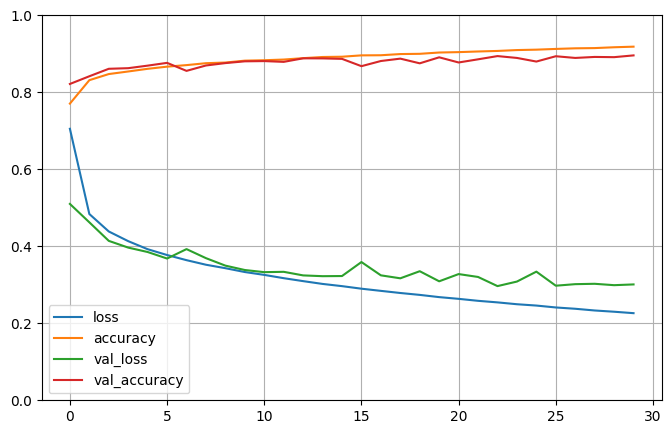

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
X_new = X